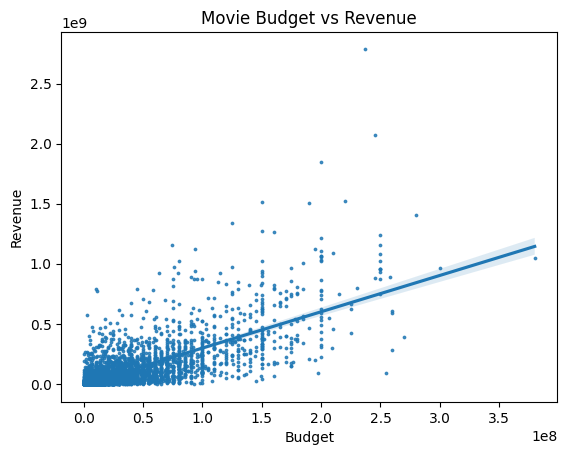

In [166]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import scipy

movies = pd.read_csv('data/movies_metadata.csv',low_memory=False)[['budget',
                                                      'original_title', 'genres',
                                                      'revenue','vote_average']]


movies['budget'] = movies['budget'].apply(pd.to_numeric, errors='coerce')
movies['revenue'] = movies['revenue'].apply(pd.to_numeric, errors='coerce')
movies['vote_average'] = movies['vote_average'].apply(pd.to_numeric, errors='coerce')
movies = movies.dropna()
movies = movies[movies.budget != 0]
movies = movies[movies.revenue != 0]

movies['genres'] = movies['genres'].apply(ast.literal_eval)
movies['genres'] = movies['genres'].apply(lambda x: x[0]['name'] if len(x) > 0 else None)

plot1 = sns.regplot(x='budget', y='revenue', data=movies, scatter_kws={'s':3})
plot1.set_title('Movie Budget vs Revenue')
plot1.set_xlabel('Budget')
plot1.set_ylabel('Revenue')
plot1.figure.savefig('charts/output_figure.png',dpi=600)


In [167]:
from scipy.stats import linregress
slope, intercept, r, p, std_err = linregress(movies['budget'], movies['revenue'])
print(slope)
print(r)
print(p)

3.0209391248649142
0.7302708168889315
0.0


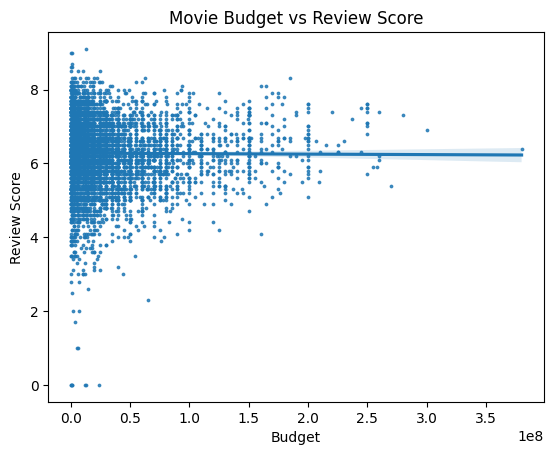

In [168]:
plot2 = sns.regplot(x='budget', y='vote_average', data=movies, scatter_kws={'s':3})
plot2.set_title('Movie Budget vs Review Score')
plot2.set_xlabel('Budget')
plot2.set_ylabel('Review Score')
plot2.figure.savefig('charts/output_figure2.png',dpi=600)

In [169]:
slope, intercept, r, p, sterr = scipy.stats.linregress(x=plot2.get_lines()[0].get_xdata(),
                                                       y=plot2.get_lines()[0].get_ydata())
print(slope)
print(r)
print(p)

-1.303377570719016e-10
-1.0
0.0


3.3474005473985153
0.7600308493661463
1.0996437071335736e-181


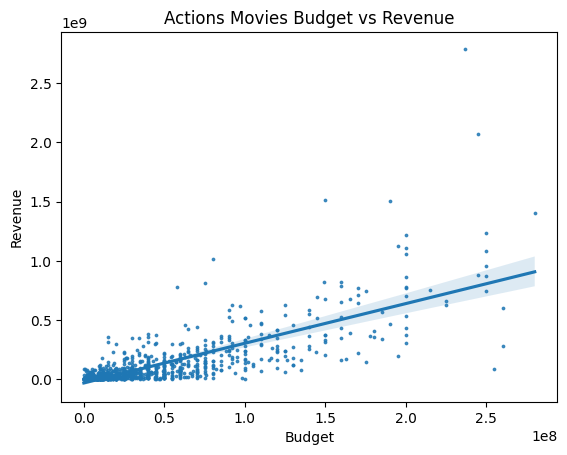

In [170]:
movies_action = movies[movies.genres == "Action"]
plot3 = sns.regplot(x='budget', y='revenue', data=movies_action, scatter_kws={'s':3})
plot3.set_title('Actions Movies Budget vs Revenue')
plot3.set_xlabel('Budget')
plot3.set_ylabel('Revenue')
plot3.figure.savefig('charts/output_figure3.png',dpi=600)
slope, intercept, r, p, std_err = linregress(movies_action['budget'], movies_action['revenue'])
print(slope)
print(r)
print(p)

2.4334583837319013
0.5947185960435045
4.707635403871533e-103


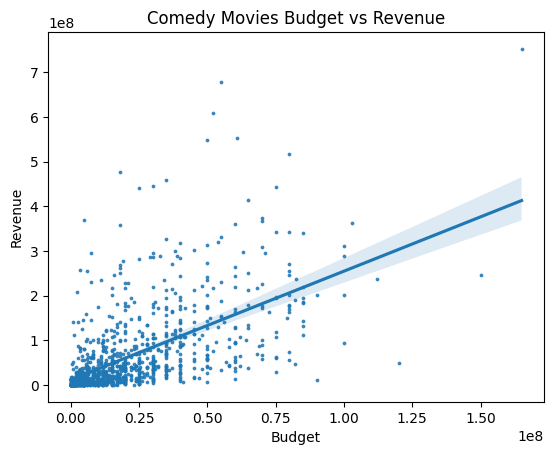

In [171]:
movies_comedy = movies[movies.genres == "Comedy"]
plot4 = sns.regplot(x='budget', y='revenue', data=movies_comedy, scatter_kws={'s':3})
plot4.set_title('Comedy Movies Budget vs Revenue')
plot4.set_xlabel('Budget')
plot4.set_ylabel('Revenue')
plot4.figure.savefig('charts/output_figure4.png',dpi=600)
slope, intercept, r, p, std_err = linregress(movies_comedy['budget'], movies_comedy['revenue'])
print(slope)
print(r)
print(p)